In [13]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Моделирование ОУ в ДУ

Модель ВИЧ-инфекции (HIV)

- H - число здоровых клеток
- I - число инфицированных клеток
- V - число клеток вируса

$$ \begin{cases}
\frac{dH(t)}{dt} = kr_1 - kr_2 H(t) - kr_3 H(t) V(t) \\
\frac{dI(t)}{dt} = kr_3H(t)V(t) - kr_4I(t)\\
\frac{dV(t)}{dt} = -kr_3H(t)V(t) - kr_5V(t) + kr_6 I(t)
\end{cases} $$


In [14]:
kr1 = 1e5 # новых здоровых клеток в год
kr2 = 0.1 # смертность здоровых клеток
kr3 = 2e-7 # здоровые клетки превращаются в инфицированные клетки
kr4 = 0.5 # уровень смертности инфицированных клеток
kr5 = 5 # смертность вируса
kr6 = 100 # уровень появления вируса от инфицированных клеток

In [15]:
def hiv(x, t):
    
    h, i, v = x[0], x[1], x[2]
    p = kr3 * h * v
    dhdt = kr1 - kr2 * h - p 
    didt = p - kr4 * i
    dvdt = -p - kr5 * v + kr6 * i
    
    return [dhdt, didt, dvdt]

In [16]:
x0 = [1e6, 0, 100] # здоровые клетки, инфицированные клетки, вирус
t = np.linspace(0, 15, 1000)
x = odeint(hiv, x0, t)

In [17]:
h = x[:, 0]
i = x[:, 1]
v = x[:, 2]

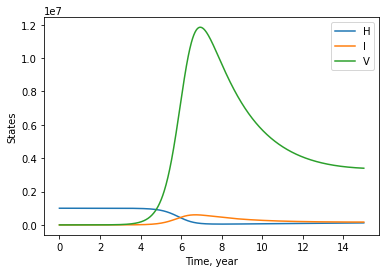

In [19]:
plt.plot(t, h, label='H')
plt.plot(t, i, label='I')
plt.plot(t, v, label='V')
plt.ylabel('States')
plt.xlabel('Time, year')

plt.legend()

plt.show()

## Cчитываем данные

In [20]:
import pandas as pd

In [21]:
df = pd.read_excel('0_ode_HIV_infection/data/hiv_data.xlsx')

In [22]:
v_point = np.power(10, df['lv'])

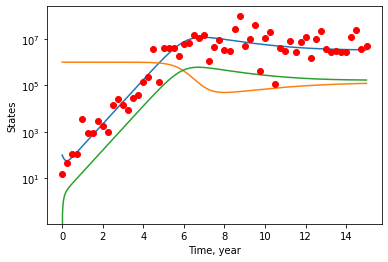

In [23]:
plt.semilogy(t, v)
plt.semilogy(t, h)
plt.semilogy(t, i)
plt.semilogy(df['time'], v_point, 'ro')
plt.ylabel('States')
plt.xlabel('Time, year')

plt.show()

In [11]:
# в логорифмическом масштабе

# plt.semilogy(t, h)
# plt.show()